In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as py
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import string
import nltk
import re

In [2]:
dataset_columns = ["target", "ids", "date", "flag", "user", "text"]
dataset_encode = "ISO-8859-1"
df=pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = dataset_encode,names=dataset_columns)

In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [5]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [6]:
#remove punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['clean_text']=df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl Awww thats a b...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [7]:
#remove hyperlink
df['clean_text'] = df['clean_text'].str.replace(r"http\S+", "") 
#remove emoji
df['clean_text'] = df['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#convert all words to lowercase
df['clean_text'] = df['clean_text'].str.lower()
df.head()

C:\Users\Vidushi\AppData\Local\Temp\ipykernel_2068\252729658.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace(r"http\S+", "")
C:\Users\Vidushi\AppData\Local\Temp\ipykernel_2068\252729658.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [8]:
#tokenization
nltk.download('punkt')
def tokenize(text):
    split=re.split("\W+",text) 
    return split
df['clean_text_tokenize']=df['clean_text'].apply(lambda x: tokenize(x.lower()))


[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [9]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Vidushi/nltk_data'
    - 'C:\\Users\\Vidushi\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Vidushi\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Vidushi\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Vidushi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [10]:
# #stopwords
# nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
df['clean_text_tokenize_stopwords'] = df['clean_text_tokenize'].apply(lambda x: remove_stopwords(x))
df.head(10)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Vidushi/nltk_data'
    - 'C:\\Users\\Vidushi\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Vidushi\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Vidushi\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Vidushi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [11]:
new_df = pd.DataFrame()
new_df['text'] = df['clean_text']
new_df['label'] = df['target']
new_df['label'] = new_df['label'].replace(4,1)

In [12]:
print(new_df.head())
print('Label: \n', new_df['label'].value_counts())


                                                text  label
0  switchfoot   awww thats a bummer  you shoulda ...      0
1  is upset that he cant update his facebook by t...      0
2  kenichan i dived many times for the ball manag...      0
3    my whole body feels itchy and like its on fire       0
4  nationwideclass no its not behaving at all im ...      0
Label: 
 0    800000
1    800000
Name: label, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
X = new_df['text']
y = new_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1520000,) (80000,) (1520000,) (80000,)


In [14]:
y_train.value_counts()

0    760001
1    759999
Name: label, dtype: int64

In [15]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [16]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [17]:
validation = model.predict(X_test)

In [18]:
validation1 = model.predict(X_train)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, validation1)

0.843316447368421

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, validation)

0.7736

<AxesSubplot: >

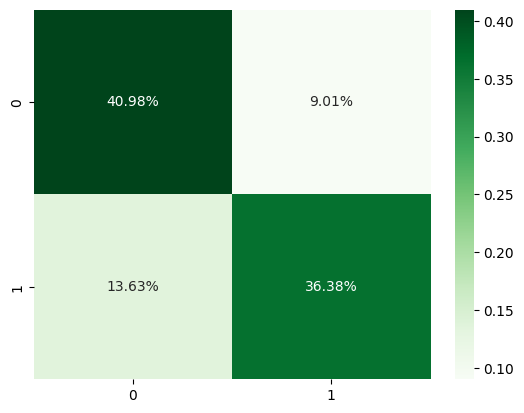

In [21]:
cf_matrix = confusion_matrix(y_test, validation)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')

In [22]:
print(classification_report(y_test, validation))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78     39999
           1       0.80      0.73      0.76     40001

    accuracy                           0.77     80000
   macro avg       0.78      0.77      0.77     80000
weighted avg       0.78      0.77      0.77     80000



In [23]:
train = pd.DataFrame()
train['label'] = y_train
train['text'] = X_train

def predict_category(s, train=X_train, model=model):
    pred = model.predict([s])
    return pred[0]

In [24]:
predict_category("i wanna shot myself")

0

In [25]:
predict_category("i Kill you")

0

In [27]:
predict_category("I'm cute")

1

In [31]:
predict_category("I hate my self")

0